In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

Loading the data from Antoine

In [5]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [6]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just Group 3 group

In [8]:
group3_list = set()

for column in data.columns:
    if "Group 3" in column: 
        group3_list = group3_list.union(set(data[column].replace({"":None}).dropna()))   

print(group3_list)

{'ZIC4', 'LHX9', 'EZH2', 'KDM3A', 'SMARCA4', 'MYC', 'KDM5B', 'KDM4C', 'KDM5A', 'ZIC1', 'KDM1A', 'ATP10A', 'CRX', 'IRX8', 'CHD7', 'GABRA3', 'LIN28B', 'GBRA5', 'LHX2', 'ZMYM3', 'RARX2', 'HLX', 'SMAD9', 'TGFBR1', 'KDM7A', 'IMPG2', 'ANPRC', 'GABRA5', 'KDM6A'}


# Creating a Network starting from All Omnipath interactions

In [9]:
group3_net = Network(group3_list, resources = resources.interactions)

Error: node ZIC4 is not present in the resources database
Error: node LHX9 is not present in the resources database
Error: node ATP10A is not present in the resources database
Error: node IRX8 is not present in the resources database
Error: node GBRA5 is not present in the resources database
Error: node ZMYM3 is not present in the resources database
Error: node RARX2 is not present in the resources database
Error: node IMPG2 is not present in the resources database
Error: node ANPRC is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [10]:
group3_net.add_node("GABRA5")

In [11]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,EZH2,Q15910,NaN
1,KDM3A,Q9Y4C1,NaN
2,SMARCA4,P51532,NaN
3,MYC,P01106,NaN
4,KDM5B,Q9UGL1,NaN
5,KDM4C,Q9H3R0,NaN
6,KDM5A,P29375,NaN
7,ZIC1,Q15915,NaN
8,KDM1A,O60341,NaN
9,CRX,O43186,NaN


In [12]:
group3_net.complete_connection(maxlen=6, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True, consensus=False)

In [13]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,EZH2,Q15910,NaN
1,KDM3A,Q9Y4C1,NaN
2,SMARCA4,P51532,NaN
3,MYC,P01106,NaN
4,KDM5B,Q9UGL1,NaN
...,...,...,...
85,CEBPA,P49715,NaN
86,SIGNOR-C73,SIGNOR-C73,NaN
87,TRIM71,Q2Q1W2,NaN
88,SIGNOR-C97,SIGNOR-C97,NaN


In [14]:
group3_net.edges

,source,target,Type,Effect,References
0,Q15910,Q15672,None,inhibition,23836662
1,Q15672,Q13315,None,stimulation,19051271
2,Q13315,Q16665,None,stimulation,21095582
3,Q16665,Q9Y4C1,None,stimulation,32938217
4,Q13315,Q15910,None,inhibition,24162653
...,...,...,...,...,...
290,SIGNOR-C97,P15172,None,inhibition,10066785
291,P46531,SIGNOR-C97,None,form complex,7566092
292,SIGNOR-C97,P24385,None,stimulation,11486031
293,P28360,P20226,None,inhibition,8700832


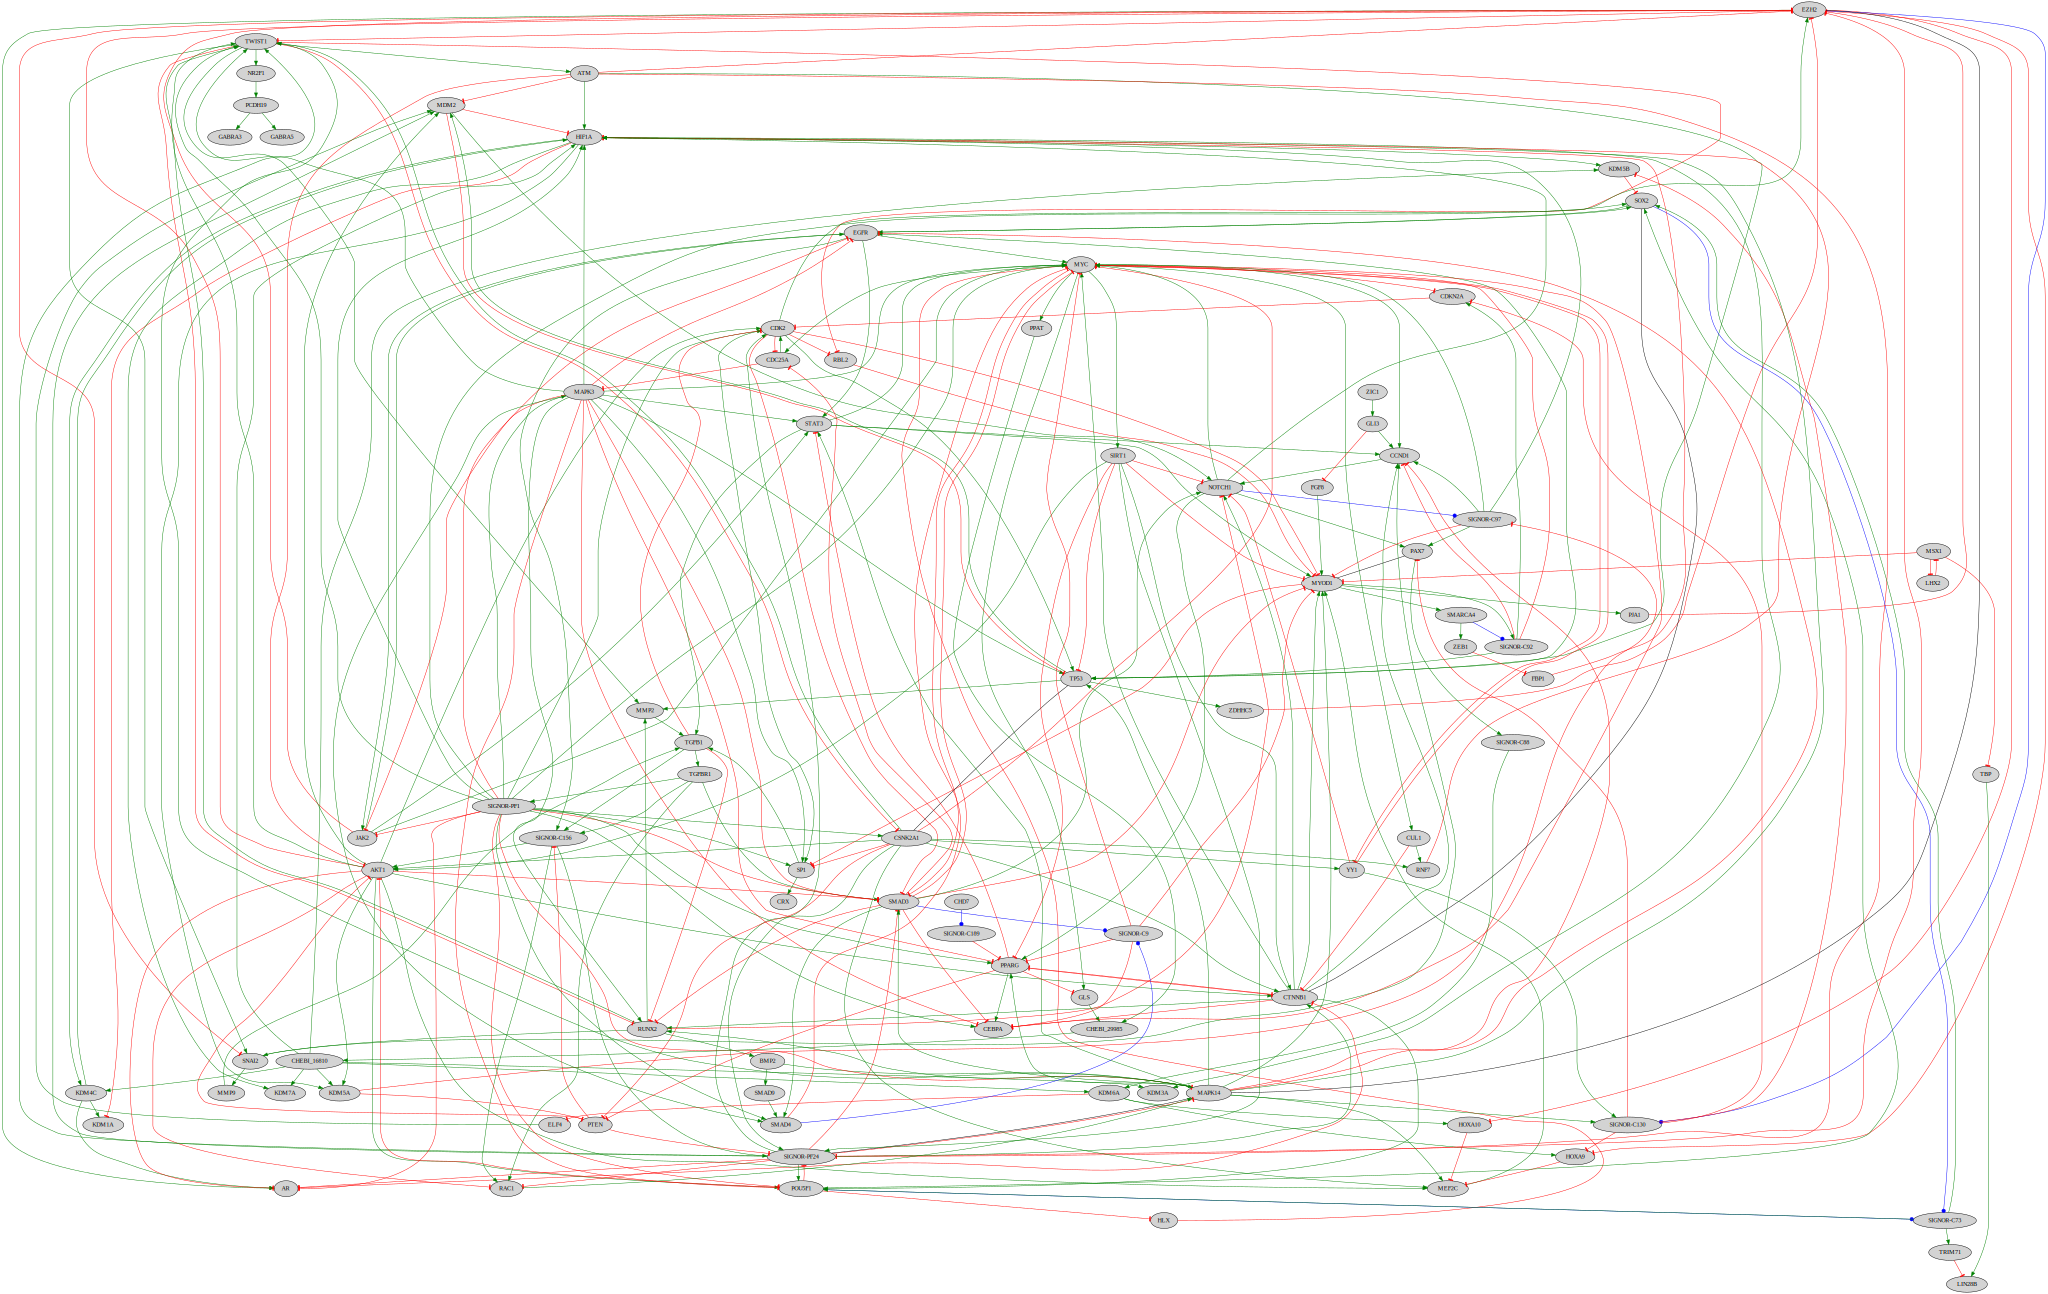

In [15]:
group3_visualizer = NetworkVisualizer(group3_net,color_by='effect')
output = figures_folder + "Group3/Group3_signor"
group3_visualizer.render(output_file=output)

# Exporting Network in sif file

In [16]:
from neko._outputs.exports import Exports

In [17]:
export = Exports(group3_net)

In [18]:
export.export_sif(sif_output + "group3_signor.sif")

In [20]:
df = resources.interactions

In [21]:
df[df["source"] == "SIGNOR-C143"]

,source,target,is_directed,is_stimulation,is_inhibition,form_complex,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources
25460,SIGNOR-C143,P35222,True,False,True,False,False,False,False,llicata,17208333,SIGNOR-250647
25461,SIGNOR-C143,P49815,True,True,False,False,True,True,False,miannu,32294430,SIGNOR-274101; SIGNOR-274102
25462,SIGNOR-C143,Q9GZM8,True,True,False,False,False,False,False,llicata,12796778,SIGNOR-250652
25463,SIGNOR-C143,SIGNOR-PH219,False,True,False,False,False,False,False,lperfetto,12640120,SIGNOR-273192
